In [127]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [128]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# 1. Data

In [129]:
datas = pd.read_csv("datas/movielens_small/ratings.csv")

datas.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


# 2. Data Analysis

In [130]:
# 1. describe (통계 정보 1. value)
datas.describe()

,userId,movieId,rating,timestamp
count,100004.000000,100004.000000,100004.000000,1.000040e+05
mean,347.011310,12548.664363,3.543608,1.129639e+09
std,195.163838,26369.198969,1.058064,1.916858e+08
min,1.000000,1.000000,0.500000,7.896520e+08
25%,182.000000,1028.000000,3.000000,9.658478e+08
50%,367.000000,2406.500000,4.000000,1.110422e+09
75%,520.000000,5418.000000,4.000000,1.296192e+09
max,671.000000,163949.000000,5.000000,1.476641e+09


In [131]:
# 2. info (통계 정보 2. data structure)
datas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100004 entries, 0 to 100003
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100004 non-null  int64  
 1   movieId    100004 non-null  int64  
 2   rating     100004 non-null  float64
 3   timestamp  100004 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [132]:
# 3. 불필요한 칼럼 제거
datas.drop("timestamp", axis=1, inplace=True)
datas.head()

,userId,movieId,rating
0,1,31,2.5
1,1,1029,3.0
2,1,1061,3.0
3,1,1129,2.0
4,1,1172,4.0


In [133]:
# 4. unique data set check
print("사용자 수 : {} 명".format(datas['userId'].unique().size))
print("평가된 영화 수 : {} 개".format(datas['movieId'].unique().size))

사용자 수 : 671 명
평가된 영화 수 : 9066 개


# 2. Matrix Factorization

## 1. MF Model Process

In [134]:
# 1. split train and test
from sklearn.model_selection import train_test_split

train_df, test_df = train_test_split(datas, test_size=0.2, random_state=42)
print("Train dataset shape : {}".format(train_df.shape))
print("Test dataset shape : {}".format(test_df.shape))

Train dataset shape : (80003, 3)
Test dataset shape : (20001, 3)


In [135]:
# 2. set pivot
pivot_df = train_df.pivot_table("rating", index="userId", columns="movieId")
pivot_df.fillna(0, inplace=True)
pivot_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [139]:
# 3. Setting Value
Interaction = pivot_df.to_numpy()

num_user, num_item = Interaction.shape
latent_factor = 20
learning_rate = 0.01
reg = 0.01

pivot_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [143]:
# 4. Setting Latent Factor Matrix p_u(사용자), q_i(아이템)
p_u = np.random.normal(size=(num_user, latent_factor))
q_i = np.random.normal(size=(num_item, latent_factor))

print("사용자 수 : {} 명, 사용자 잠재 변수 행렬 shape {}".format(num_user, p_u.shape))
print("영화 수 : {} 개, 영화 잠재 변수 행렬 shape {}".format(num_item, q_i.shape))

q_i

사용자 수 : 671 명, 사용자 잠재 변수 행렬 shape (671, 20)
영화 수 : 8399 개, 영화 잠재 변수 행렬 shape (8399, 20)


array([[ 0.54044632, -0.4762852 ,  0.82141929, ..., -0.59229571,
         0.85453562,  0.51414558],
       [-2.01360855,  1.89124362,  1.35192826, ..., -1.29418578,
        -1.67014578, -0.66600777],
       [ 0.89003153, -0.74002445, -1.29538344, ..., -1.19792519,
        -1.89583133,  0.76784677],
       ...,
       [ 0.30566657, -1.06013677, -0.39403486, ...,  0.88648523,
         1.68955154, -0.31270823],
       [ 1.71066878,  0.7866683 , -0.51979586, ..., -2.01443864,
        -0.40971366, -0.50662302],
       [ 0.72135505, -1.84483459,  1.05767969, ..., -1.40974153,
        -0.00620063,  0.1842764 ]])

#### 사용자, 아이템 별로 랜덤한 잠재 변수 행렬이 각 각의 요소의 크기만큼, latent_factor 사이즈 만큼 만들어진 것을 알 수 있음

In [150]:
# 5. Confidence ref.Inputs with varying confidence levels
user_confidence = (pivot_df > 0).sum(axis=1)
item_confidence = (pivot_df > 0).sum(axis=0)

## 사용자의 평점 빈도 수(크기가 될 수 있음) 및 해당 사용자가 평가한 영화의 평점 발생 빈도 수(크기가 될 수 있음)을 더해
### 평가에 대한 신뢰도 부여
confidences = train_df.apply(lambda x: 
                   user_confidence.loc[x['userId']] + 
                   item_confidence.loc[x['movieId']], axis=1)
train_df['confidence'] = confidences
train_df.head()

,userId,movieId,rating,confidence
37865,273,5816,4.5,138
46342,339,2028,4.5,229
64614,461,3895,0.5,555
41974,300,3578,4.5,170
50236,369,292,3.0,139


In [160]:
# 6. Set confidence pivot
confidence_df = train_df.pivot_table(values="confidence", index="userId", columns="movieId")
confidence_df.fillna(1, inplace=True)

confidence_matrix = confidence_df.to_numpy()

confidence_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,163.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [161]:
# 7. scaling confidence matrix
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled_confidence = scaler.fit_transform(confidence_matrix)
scaled_confidence += 0.0001
scaled_confidence

array([[1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       ...,
       [1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [1.00000000e-04, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04],
       [1.38975768e-01, 1.00000000e-04, 1.00000000e-04, ...,
        1.00000000e-04, 1.00000000e-04, 1.00000000e-04]])

In [162]:
# 8. bias setting
b_u = np.zeros(num_user)
b_i = np.zeros(num_item)
b = np.mean(Interaction[Interaction != 0])

In [163]:
# 9. test data setting
test_Interaction = test_df.pivot_table("rating", index="userId", columns="movieId")
test_Interaction.fillna(0, inplace=True)
test_Interaction = test_Interaction.to_numpy()

In [164]:
# 10. func get each prediction
def get_each_prediction(i_u, i_i):
    return b + b_u[i_u] + b_i[i_i] + np.dot(p_u[i_u, :], q_i[i_i, :].T)

In [165]:
# 11. func get whole prediction
def get_whole_prediction():
    return b + b_u[:, np.newaxis] + b_i[np.newaxis:,] + np.dot(p_u, q_i.T)

In [167]:
# 12. func gradient_descent
def gradient_descent(i_u, i_i, rating):
    prediction = get_each_prediction(i_u, i_i)
    
    # Adding bias
    dbu = -2 * scaled_confidence[i_u][i_i] * (rating - b_u[i_u] - b_i[i_i] - b - prediction) + 2 * reg * b_u[i_u]
    dbi = -2 * scaled_confidence[i_u][i_i] * (rating - b_u[i_u] - b_i[i_i] - b - prediction) + 2 * reg * b_i[i_i]
    
    b_u[i_u] -= learning_rate * dbu
    b_i[i_i] -= learning_rate * dbi
    
    # 목적 함수
    dp = -2 * scaled_confidence[i_u][i_i] * \
             (rating - b_u[i_u] - b_i[i_i] - b - prediction) * q_i[i_i,:] + 2 * (reg * p_u[i_u, :])
    dq = -2 * scaled_confidence[i_u][i_i] * \
             (rating - b_u[i_u] - b_i[i_i] - b - prediction) * p_u[i_u,:] + 2 * (reg * q_i[i_i, :])
    
    p_u[i_u, :] -= learning_rate * dp
    q_i[i_i, :] -= learning_rate * dq

In [168]:
# 13. loss function
def test_loss():
    xi, yi = test_Interaction.nonzero()
    predicted = get_whole_prediction()
    test_loss = 0
    for x, y in zip(xi, yi):
        test_loss += np.power(test_Interaction[x, y] - predicted[x, y], 2)
    return np.sqrt(test_loss) / len(xi)

def loss():
    xi, yi = Interaction.nonzero()
    predicted = get_whole_prediction()
    test_loss = 0
    for x, y in zip(xi, yi):
        test_loss += np.power(Interaction[x, y] - predicted[x, y], 2)
    return np.sqrt(test_loss) / len(xi)

In [169]:
# ---> Loss Function 에서 계산하려 드는 것
xi, yi = Interaction.nonzero()
preds = get_whole_prediction()

print("실제 평점 :", Interaction[xi[0],yi[0]], "/", "예측 평점",preds[xi[0], yi[0]])

실제 평점 : 2.5 / 예측 평점 9.064257102456502


In [177]:
pivot_df.head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [178]:
pd.DataFrame(preds, columns=pivot_df.columns, index=pivot_df.index).head()

movieId,1,2,3,4,5,6,7,8,9,10,...,160656,160718,161084,161155,161594,161830,161918,161944,162542,163949
userId,,,,,,,,,,,,,,,,,,,,,
1,0.884513,5.584685,6.497070,9.708395,16.624101,6.696290,0.540420,-0.310425,1.803284,9.703544,...,1.119601,-2.960862,0.208099,-4.918343,0.836256,-4.792025,-7.044681,6.059677,4.658960,7.578373
2,0.350271,-0.766293,16.438850,-0.708230,8.355216,-5.625689,0.402376,5.881371,7.282028,1.180610,...,-1.232645,8.911021,-0.053440,5.833739,10.817425,1.900533,5.106505,-7.735856,0.799581,2.590154
3,2.483291,3.064839,2.648071,4.005560,2.515668,-0.705426,0.123406,0.834631,2.347246,6.360129,...,-1.958247,0.882711,0.547188,1.916087,-1.982550,8.182961,-0.297023,7.638064,10.298484,1.813520
4,2.421085,6.694861,1.258318,-4.640464,3.736591,-0.401512,3.948306,-0.388398,-11.227765,6.718532,...,1.486312,7.777596,-0.885231,6.404907,-1.554710,7.868709,6.140349,2.387908,3.570075,4.664821
5,2.022749,1.987994,-4.335297,2.188540,-1.667277,12.250744,1.389931,0.414867,1.380840,7.958277,...,1.653435,4.049665,5.524316,-0.604136,0.801663,7.167913,-0.038110,4.674418,3.514414,4.451934


In [179]:
# 그렇게 학습하려 하는 것.
# Latent Factor 인 p_u와 p_i
print("User Latent Factor Shape : {}".format(p_u.shape))
print("Item Latent Factor Shape : {}".format(q_i.shape))

User Latent Factor Shape : (671, 20)
Item Latent Factor Shape : (8399, 20)


In [21]:
# 14. fitting
epoch = 30
for _epoch in range(epoch):
    for i_u in range(num_user):
        for i_i in range(num_item):
            if Interaction[i_u, i_i] > 0:
                gradient_descent(i_u, i_i, Interaction[i_u, i_i])
    _loss = loss()
    _test_loss = test_loss()
    
    print("Epoch: {} ; loss = {} ; test_loss = {}".format(_epoch + 1, _loss, _test_loss))

Epoch: 1 ; loss = 0.009850688861182223 ; test_loss = 0.021448232065605304
Epoch: 2 ; loss = 0.008922130763782449 ; test_loss = 0.01994162688241715
Epoch: 3 ; loss = 0.008458128072583301 ; test_loss = 0.01918063726655095
Epoch: 4 ; loss = 0.008171192412114898 ; test_loss = 0.018700655153289766
Epoch: 5 ; loss = 0.007974344422619316 ; test_loss = 0.01836331522926509
Epoch: 6 ; loss = 0.007830408943399678 ; test_loss = 0.018109989417830524
Epoch: 7 ; loss = 0.007720453867102879 ; test_loss = 0.017910977769070205
Epoch: 8 ; loss = 0.007633702289552977 ; test_loss = 0.017749405715521888
Epoch: 9 ; loss = 0.0075635260478498206 ; test_loss = 0.01761488614014191
Epoch: 10 ; loss = 0.0075056087539503704 ; test_loss = 0.017500632307446137
Epoch: 11 ; loss = 0.007457012727371031 ; test_loss = 0.017402000059640522
Epoch: 12 ; loss = 0.00741566707934456 ; test_loss = 0.01731569216008793
Epoch: 13 ; loss = 0.0073800693673409835 ; test_loss = 0.01723929648832839
Epoch: 14 ; loss = 0.00734910305013715

(671, 671)


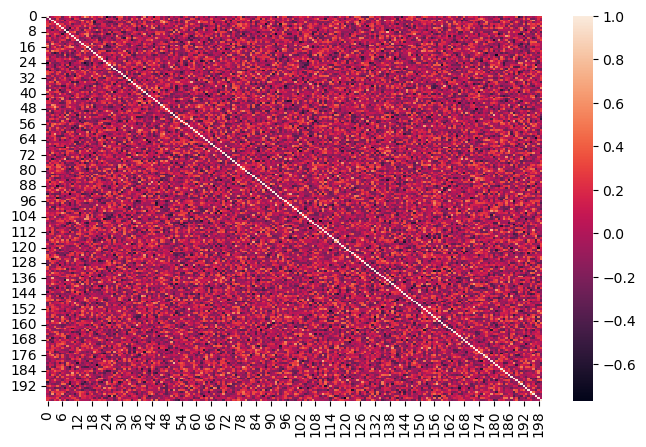

In [38]:
# 15. Use - user latent factor
corr = np.corrcoef(p_u)
print(corr.shape)

corr2 = corr[:200, :200]

plt.figure(figsize=(8,5))
sns.heatmap(corr2)

plt.show()

In [55]:
# best user, worst user parse
target_user_id = 3
target_user_idx = target_user_id - 1

sorted_idx = corr[target_user_idx].argsort()[::-1]

best_user_id = sorted_idx[1] + 1
worst_user_id = sorted_idx[-1] + 1

In [56]:
movies_df = pd.read_csv("datas/movielens_small/movies.csv")
movies_df.set_index("movieId", inplace=True)

movies_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [57]:
target_movie_ids = datas[datas['userId'] == target_user_id].sort_values("rating", ascending=False)['movieId'].values
best_movie_ids = datas[datas['userId'] == best_user_id].sort_values("rating", ascending=False)['movieId'].values
worst_movie_ids = datas[datas['userId'] == worst_user_id].sort_values("rating", ascending=False)['movieId'].values

target_movies = movies_df.loc[target_movie_ids]['title'].values
best_movies = movies_df.loc[best_movie_ids]['title'].values
worst_movies = movies_df.loc[worst_movie_ids]['title'].values

In [58]:
np.isin(target_movies,best_movies)

array([False, False, False, False, False,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
        True,  True, False, False, False, False, False, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False,  True, False, False, False,  True])

In [59]:
np.isin(target_movies,worst_movies)

array([False,  True,  True, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False])

## 2. Use

In [186]:
# 1. model setting
from model import MatrixFactorization

train_df, test_df = train_test_split(datas, test_size=0.2, random_state=42)
model = MatrixFactorization(train_df, test_df, latent_factor=10)

In [187]:
# 2. Train
model.fit(100)

Epoch: 1 ; loss = 2.3851497790802174 ; test_loss = 2.4581965795461285
Epoch: 2 ; loss = 2.2474266860073366 ; test_loss = 2.350526303612092
Epoch: 3 ; loss = 2.1796643080558202 ; test_loss = 2.300175787889798
Epoch: 4 ; loss = 2.138519876123988 ; test_loss = 2.2710988341271885
Epoch: 5 ; loss = 2.110707056885577 ; test_loss = 2.2524964182544505
Epoch: 6 ; loss = 2.090621911519279 ; test_loss = 2.2398371509695005
Epoch: 7 ; loss = 2.0754406081137944 ; test_loss = 2.2308527099999176
Epoch: 8 ; loss = 2.063568743332861 ; test_loss = 2.2242750995019147
Epoch: 9 ; loss = 2.0540330943941574 ; test_loss = 2.219340691425165
Epoch: 10 ; loss = 2.0462050437206813 ; test_loss = 2.2155643252601283
Epoch: 11 ; loss = 2.0396606612998105 ; test_loss = 2.2126249718235425
Epoch: 12 ; loss = 2.034104077879764 ; test_loss = 2.2103032331258086
Epoch: 13 ; loss = 2.0293228934410124 ; test_loss = 2.208445137262957
Epoch: 14 ; loss = 2.025160956552338 ; test_loss = 2.2069401917249367
Epoch: 15 ; loss = 2.0215

    epoch  train_loss  test_loss
0       0    2.385150   2.458197
1       1    2.247427   2.350526
2       2    2.179664   2.300176
3       3    2.138520   2.271099
4       4    2.110707   2.252496
..    ...         ...        ...
95     95    1.963923   2.193228
96     96    1.963606   2.193215
97     97    1.963287   2.193201
98     98    1.962967   2.193185
99     99    1.962645   2.193168

[100 rows x 3 columns]


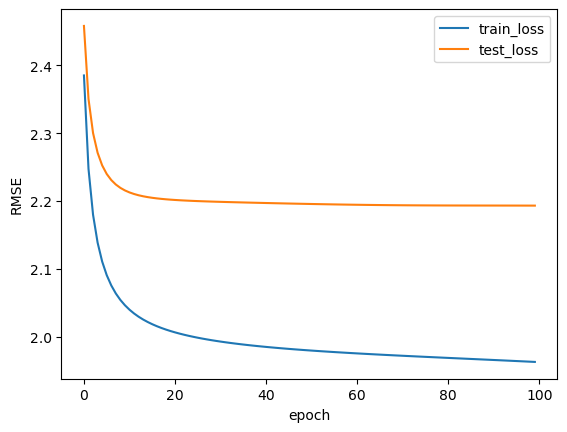

In [188]:
# Result
history = model.history

df = pd.DataFrame(history)
df.columns= ["epoch","train_loss","test_loss"]
print(df)
df.loc[:][["train_loss","test_loss"]].plot()
plt.xlabel("epoch")
plt.ylabel("RMSE")
plt.legend()
plt.show()

In [189]:
# 결론적으로는 Latent Factor를 훈련시켜서
# 평점 예측기 모델을 만들게 된 것.

# 테스트 데이터에 대한 평점 예측 손실 값 MSE
mse_history = []
xi, yi = model.test_datas.nonzero()
predicted = model.get_whole_prediction()
test_loss = 0
for x, y in zip(xi, yi):
    test_data = model.test_datas[x, y]
    pred = predicted[x, y]
    err = test_data - pred
    loss = np.power(err, 2)
    mse_history.append([test_data, pred, abs(err)])
    test_loss += loss    

anal_df = pd.DataFrame(mse_history, columns=['y', 'y_pred', 'err'])
anal_df.head()

,y,y_pred,err
0,3.5,3.357645,0.142355
1,4.0,1.846482,2.153518
2,3.0,3.386239,0.386239
3,1.0,0.013377,0.986623
4,4.0,1.833778,2.166222
